## Exploratory Data Analysis on customers and their transactions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
transactions = pd.read_csv('../../data/raw/transactions.csv')
customer_info = pd.read_csv('../../data/raw/customer_information.csv')

In [3]:
transactions.head()

,customerID,ISIN,transactionID,transactionType,timestamp,totalValue,units,channel,marketID
0,00017496858921195E5A,GRS434003000,7590224,Buy,2020-03-27,11000.0,5000.0,Internet Banking,XATH
1,00017496858921195E5A,GRS434003000,7607029,Sell,2020-04-06,12080.0,5000.0,Internet Banking,XATH
2,00017496858921195E5A,GRS434003000,7634872,Buy,2020-04-24,13400.0,5000.0,Internet Banking,XATH
3,00017496858921195E5A,GRS434003000,7652627,Sell,2020-05-07,12700.0,5000.0,Internet Banking,XATH
4,00017496858921195E5A,GRS434003000,7664807,Buy,2020-05-15,12150.0,5000.0,Internet Banking,XATH


In [4]:
customer_info.head()

,customerID,customerType,riskLevel,investmentCapacity,lastQuestionnaireDate,timestamp
0,DED5BF19E23CCCFEE322,Premium,Balanced,CAP_80K_300K,2021-11-30,2021-03-19
1,DED5BF19E23CCCFEE322,Premium,Balanced,CAP_80K_300K,2021-11-30,2022-01-21
2,6C0C752E66D5F0486C71,Mass,Income,Predicted_CAP_LT30K,2015-04-27,2018-01-02
3,3E8D8E4E07CD3210F25F,Mass,Income,CAP_30K_80K,2021-11-03,2018-01-02
4,37F996EE2A69B5C15DF3,Mass,Predicted_Conservative,Predicted_CAP_LT30K,2000-01-01,2018-01-02


### Distribution of customer types

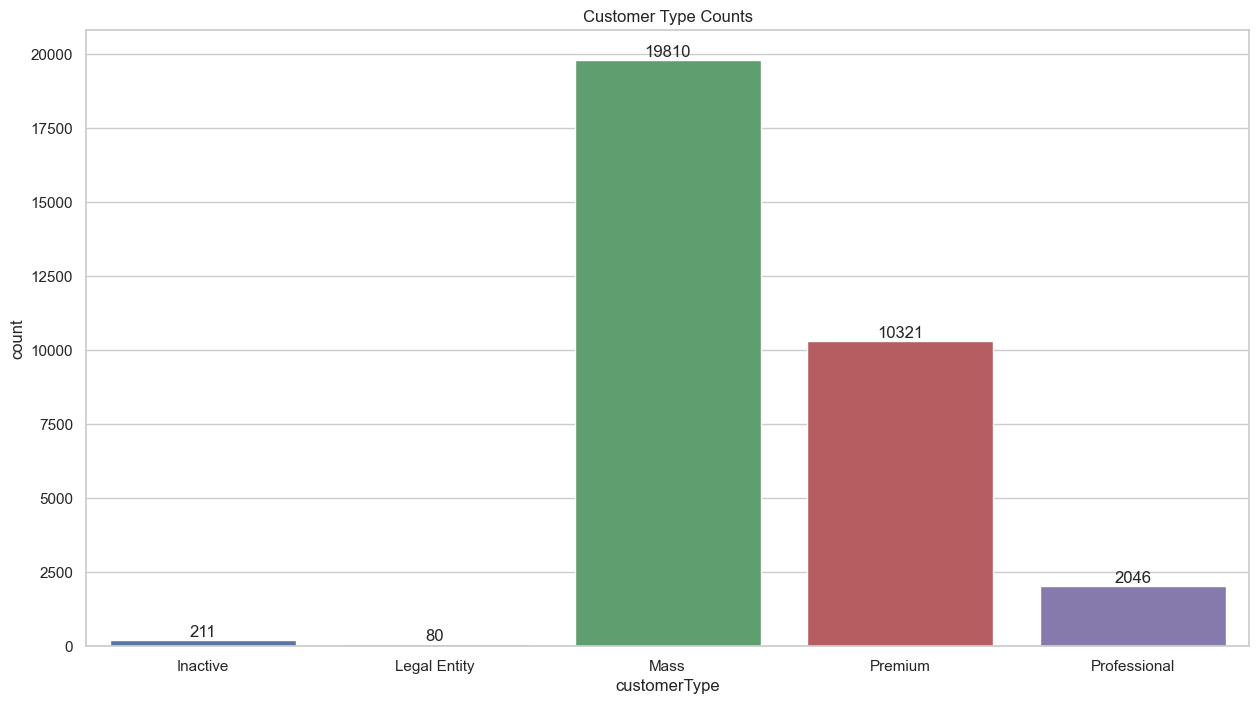

In [5]:
customer_type_counts = customer_info.groupby('customerType').size().reset_index(name='count')

# plot the graph
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=customer_type_counts,
    x='customerType',
    y='count',
    hue='customerType',
    dodge=False
)

# annotate counts on bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )

plt.title('Customer Type Counts')
plt.show()

Majority of customers are of type Mass: Less than 60k euros on investments.

### Count the number of customers with a certain customerType, riskLevel and investmentCapacity

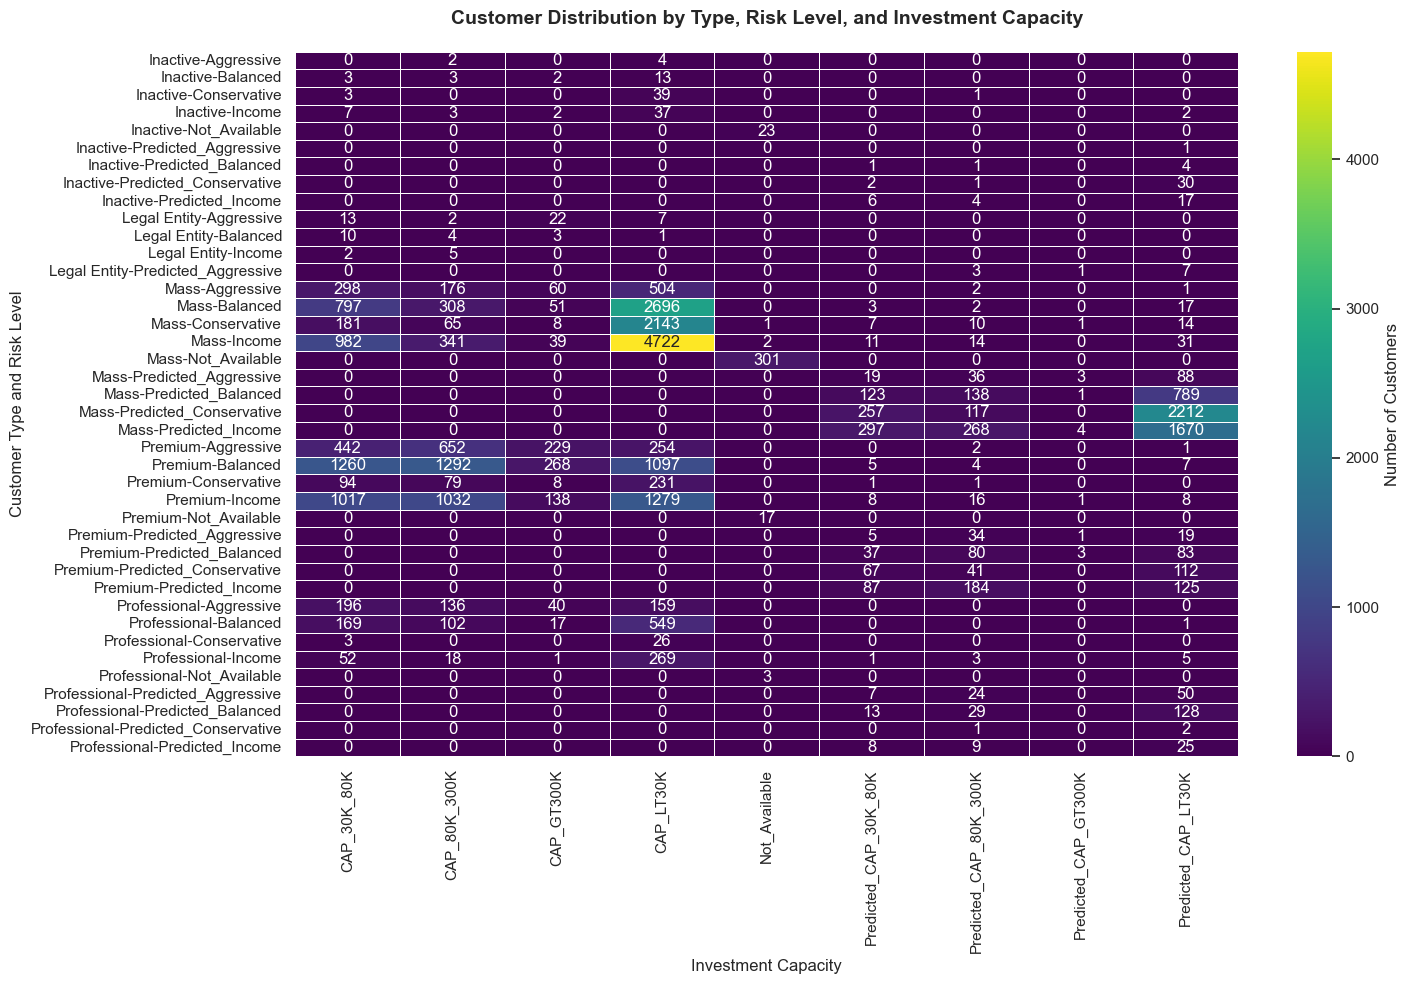

In [6]:
# heatmap of customer distribution
plt.figure(figsize=(15, 10))

pivot_data = customer_info.groupby(['customerType', 'riskLevel', 'investmentCapacity']).size().unstack(fill_value=0)

# heatmap
ax = sns.heatmap(
    pivot_data, 
    annot=True, 
    fmt='d', 
    cmap='viridis',
    linewidths=0.5,
    cbar_kws={'label': 'Number of Customers'}
)

# style the heatmap
plt.title('Customer Distribution by Type, Risk Level, and Investment Capacity', fontsize=14, pad=20, fontweight='bold')
plt.ylabel('Customer Type and Risk Level', fontsize=12)
plt.xlabel('Investment Capacity', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
# top 10 most common customer profiles
customer_info\
    .groupby(['customerType', 'riskLevel', 'investmentCapacity'])\
    .size()\
    .reset_index(name='count')\
    .sort_values(by='count', ascending=False)\
    .head(10)

,customerType,riskLevel,investmentCapacity,count
63,Mass,Income,CAP_LT30K,4722
47,Mass,Balanced,CAP_LT30K,2696
79,Mass,Predicted_Conservative,Predicted_CAP_LT30K,2212
54,Mass,Conservative,CAP_LT30K,2143
83,Mass,Predicted_Income,Predicted_CAP_LT30K,1670
91,Premium,Balanced,CAP_80K_300K,1292
106,Premium,Income,CAP_LT30K,1279
90,Premium,Balanced,CAP_30K_80K,1260
93,Premium,Balanced,CAP_LT30K,1097
104,Premium,Income,CAP_80K_300K,1032


### Distribution of transactions each customer makes

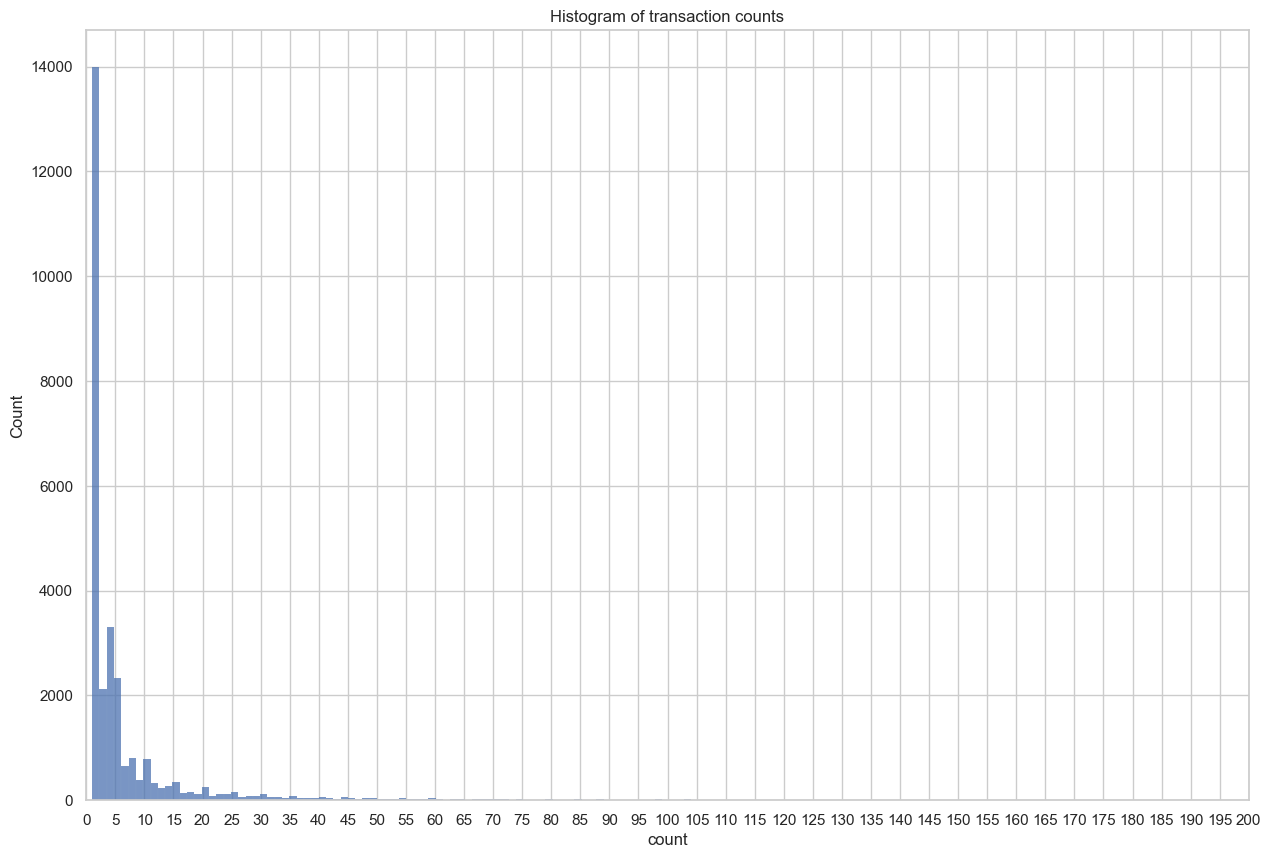

In [11]:
transaction_counts = transactions.groupby('customerID').size().reset_index(name='count')

plt.figure(figsize=(15, 10))
ax = sns.histplot(
    transaction_counts,
    x='count',
    bins=5000
)

ax.set_xlim(0, 200) # limit the histogram
ax.set_xticks(range(0, 205, 5), labels=range(0, 205, 5))
plt.title('Histogram of transaction counts')

plt.show()

Most investors have 0 to 5 transactions. Collaborative filtering may not work very well due to low number of purchases for each customer

### Distribution of buy to sells

Distribution of buys vs distribution of sells for each customer

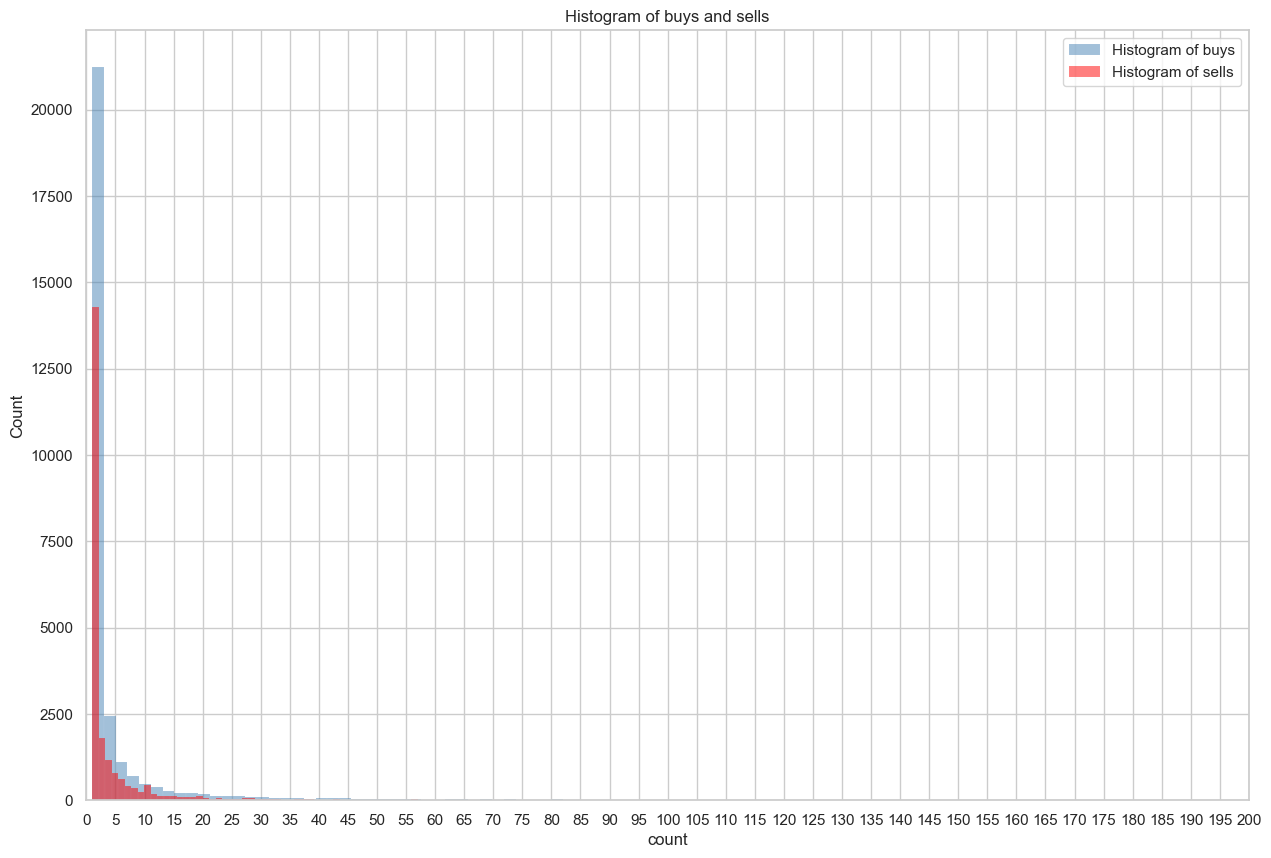

In [23]:
buys = transactions[transactions['transactionType'] == 'Buy']
sells = transactions[transactions['transactionType'] == 'Sell']

# get the counts for each customer that buys/sells
buy_counts = buys.groupby('customerID').size().reset_index(name='count')
sell_counts = sells.groupby('customerID').size().reset_index(name='count')

fig, ax = plt.subplots(
    figsize=(15, 10)
)

# plot histogram of buys
sns.histplot(
    buy_counts,
    x='count',
    bins=2000,
    ax=ax,
    label='Histogram of buys',
    color='steelblue',
    alpha=0.5
)

# plot histogram of sells
sns.histplot(
    sell_counts,
    x='count',
    bins=2000,
    ax=ax,
    label='Histogram of sells',
    color='red',
    alpha=0.5
)

ax.set_xlim(0, 200) # limit the histogram
ax.set_xticks(range(0, 205, 5), labels=range(0, 205, 5))

plt.legend()
plt.title('Histogram of buys and sells')

plt.show()

We can see that more investors purchase stock rather than sell stock.

### Buy-to-sell ratio for each investor